In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:

# Generate example data
np.random.seed(123)
T = 1000 # number of time steps
a = np.random.uniform(low=-1, high=1, size=T) # generate random constants for loss functions
b = np.random.uniform(low=-1, high=1, size=T)
P = np.linspace(0, 1, num=100) # convex set P as a sorted numpy array
beta = 1.0 / np.max(np.abs(a)) # choose beta as the inverse of the maximum absolute value of a

In [7]:

# Online Gradient Descent (OGD) algorithm
x_ogd = np.random.choice(P) # arbitrary x1 ∈ P
regret_ogd = np.zeros(T)
for t in range(1, T+1):
    # Receive loss function ft
    ft = lambda x: a[t-1] * x + b[t-1]
    # Compute gradient
    grad = a[t-1]
    # Update point x
    x_ogd = P[np.argmin([abs(x-x_ogd+grad/beta) for x in P])]
    # Compute regret
    x_star = P[np.argmin([np.sum(a[:t] * x + b[:t]) for x in P])]
    regret_ogd[t-1] = np.sum(a[:t] * (x_ogd - x_star))


In [8]:
# Follow the Approximate Leader (FAL) algorithm
x_ftal = np.random.choice(P) # arbitrary x1 ∈ P
A = 0.0
B = 0.0
regret_fal = np.zeros(T)
for t in range(1, T+1):
    # Receive loss function ft
    ft = lambda x: a[t-1] * x + b[t-1]
    # Compute gradient
    grad = a[t-1]
    A += grad**2
    # Update point x
    B+= grad**2 * x_ftal - grad/beta
    x_ftal = P[np.argmin([A*x**2 - 2*B*x + (B**2/A) for x in P])]
    # # Compute regret
    x_star = P[np.argmin([np.sum(a[:t] * x + b[:t]) for x in P])]
    regret_fal[t-1] = np.sum(a[:t] * (x_ftal - x_star))

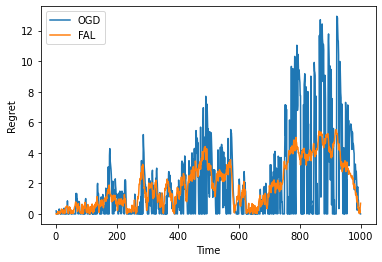

In [9]:
# Plot results
plt.plot(np.arange(1, T+1), regret_ogd, label='OGD')
plt.plot(np.arange(1, T+1), regret_fal, label='FAL')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Regret')
plt.show()